<a href="https://colab.research.google.com/github/KatieMears628/death-classification/blob/main/2Copy_of_final_project_eda_km_updates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Katie Mears - Final Project
Reclassifying Undetermined Deaths
EDA

### Load Packages

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Read Data and Explore Variables

In [ ]:
# Read in the 2015_data
death_data = pd.read_csv('2015_data.csv')
# Display the first few rows of the data
print(death_data.head())

   resident_status  education_1989_revision  education_2003_revision  \
0                1                      NaN                      3.0   
1                1                      NaN                      6.0   
2                1                      NaN                      3.0   
3                1                      NaN                      3.0   
4                1                      NaN                      5.0   

   education_reporting_flag  month_of_death sex  detail_age_type  detail_age  \
0                         1               1   M                1          84   
1                         1               1   M                1          70   
2                         1               1   F                1          91   
3                         1               1   F                1          40   
4                         1               1   F                1          89   

   age_substitution_flag  age_recode_52  ...  record_condition_18  \
0                

In [ ]:
# Print Column Titles in Original Data Set
column_titles = death_data.columns
print(column_titles)

Index(['resident_status', 'education_1989_revision', 'education_2003_revision',
       'education_reporting_flag', 'month_of_death', 'sex', 'detail_age_type',
       'detail_age', 'age_substitution_flag', 'age_recode_52', 'age_recode_27',
       'age_recode_12', 'infant_age_recode_22',
       'place_of_death_and_decedents_status', 'marital_status',
       'day_of_week_of_death', 'current_data_year', 'injury_at_work',
       'manner_of_death', 'method_of_disposition', 'autopsy', 'activity_code',
       'place_of_injury_for_causes_w00_y34_except_y06_and_y07_',
       'icd_code_10th_revision', '358_cause_recode', '113_cause_recode',
       '130_infant_cause_recode', '39_cause_recode',
       'number_of_entity_axis_conditions', 'entity_condition_1',
       'entity_condition_2', 'entity_condition_3', 'entity_condition_4',
       'entity_condition_5', 'entity_condition_6', 'entity_condition_7',
       'entity_condition_8', 'entity_condition_9', 'entity_condition_10',
       'entity_condition

In [ ]:
# Data Description of Original data set (2015_data.csv)
data_description_all = death_data.describe(include='all')
print(data_description_all)

        resident_status  education_1989_revision  education_2003_revision  \
count       6741.000000              2548.000000              4193.000000   
unique              NaN                      NaN                      NaN   
top                 NaN                      NaN                      NaN   
freq                NaN                      NaN                      NaN   
mean           1.192405                12.473312                 3.668972   
std            0.463417                 8.818307                 1.843374   
min            1.000000                 0.000000                 1.000000   
25%            1.000000                11.000000                 3.000000   
50%            1.000000                12.000000                 3.000000   
75%            1.000000                14.000000                 4.000000   
max            4.000000                99.000000                 9.000000   

        education_reporting_flag  month_of_death   sex  detail_age_type  \


In [ ]:
# Convert manner_of_death to homicide or not homicide
death_data['manner_of_death'] = death_data['manner_of_death'].replace([1, 2, 4, 5, 6, 7, None],0)
death_data['manner_of_death'] = death_data['manner_of_death'].replace([3],1)

### Missing Data

In [ ]:
# Print Missing Values per Column
missing_values_count = death_data.isnull().sum()
print(missing_values_count)

resident_status                  0
education_1989_revision       4193
education_2003_revision       2548
education_reporting_flag         0
month_of_death                   0
                              ... 
race_imputation_flag          6684
race_recode_3                    1
race_recode_5                    1
hispanic_origin                  1
hispanic_originrace_recode       1
Length: 77, dtype: int64


In [ ]:
# Print Missing Data as percentage (per column)
total_rows = death_data.shape[0]
percent_missing = (missing_values_count / total_rows) * 100
print(percent_missing)

resident_status                0.000000
education_1989_revision       62.201454
education_2003_revision       37.798546
education_reporting_flag       0.000000
month_of_death                 0.000000
                                ...    
race_imputation_flag          99.154428
race_recode_3                  0.014835
race_recode_5                  0.014835
hispanic_origin                0.014835
hispanic_originrace_recode     0.014835
Length: 77, dtype: float64


In [ ]:
total_missing_values = death_data.isnull().sum().sum()
total_elements = death_data.size
total_percent_missing = (total_missing_values / total_elements) * 100
print("Total percentage of missing data in the dataset: {:.2f}%".format(total_percent_missing))

Total percentage of missing data in the dataset: 54.73%


In [ ]:
# Isolate the Desired Columns
desired_columns = ['education_2003_revision', 'month_of_death', 'sex', 'place_of_death_and_decedents_status',
                   'marital_status', 'day_of_week_of_death', 'injury_at_work', 'manner_of_death', 'method_of_disposition',
                   'autopsy', 'icd_code_10th_revision', '358_cause_recode', '113_cause_recode', '39_cause_recode', 'race','detail_age']
new_death = death_data[desired_columns]

# List of column names to convert to categorical
categorical_columns = ['education_2003_revision', 'month_of_death', 'sex', 'place_of_death_and_decedents_status',
                   'marital_status', 'day_of_week_of_death', 'injury_at_work', 'manner_of_death',
                   'method_of_disposition', 'autopsy', 'icd_code_10th_revision', '358_cause_recode',
                   '113_cause_recode', '39_cause_recode', 'race']

# Convert the selected columns to categorical
new_death[categorical_columns] = new_death[categorical_columns].astype('category')
print(new_death.head())

  education_2003_revision month_of_death sex  \
0                     3.0              1   M   
1                     6.0              1   M   
2                     3.0              1   F   
3                     3.0              1   F   
4                     5.0              1   F   

  place_of_death_and_decedents_status marital_status day_of_week_of_death  \
0                                   1              M                    1   
1                                   1              M                    2   
2                                   4              W                    6   
3                                   4              S                    5   
4                                   6              W                    5   

  injury_at_work manner_of_death method_of_disposition autopsy  \
0              U             0.0                     B       N   
1              U             0.0                     C       N   
2              U             0.0                  

<ipython-input-14-10db1edd9b90>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_death[categorical_columns] = new_death[categorical_columns].astype('category')


In [ ]:
# Get the data types for all columns
data_types = new_death.dtypes

print(data_types)

education_2003_revision                category
month_of_death                         category
sex                                    category
place_of_death_and_decedents_status    category
marital_status                         category
day_of_week_of_death                   category
injury_at_work                         category
manner_of_death                        category
method_of_disposition                  category
autopsy                                category
icd_code_10th_revision                 category
358_cause_recode                       category
113_cause_recode                       category
39_cause_recode                        category
race                                   category
detail_age                                int64
dtype: object


In [ ]:
total_missing_values2 = new_death.isnull().sum().sum()
total_elements2 = new_death.size
total_percent_missing2 = (total_missing_values2 / total_elements2) * 100
print("Total percentage of missing data in the sample dataset: {:.2f}%".format(total_percent_missing2))

Total percentage of missing data in the sample dataset: 2.48%


In [ ]:
# Drop rows with missing values
death_dropped = new_death.dropna()

print("DataFrame after dropping rows with missing values:")
print(death_dropped)

DataFrame after dropping rows with missing values:
     education_2003_revision month_of_death sex  \
0                        3.0              1   M   
1                        6.0              1   M   
2                        3.0              1   F   
3                        3.0              1   F   
4                        5.0              1   F   
...                      ...            ...  ..   
4188                     3.0             11   M   
4189                     3.0             12   M   
4190                     4.0             12   M   
4191                     9.0             12   M   
4192                     9.0             12   M   

     place_of_death_and_decedents_status marital_status day_of_week_of_death  \
0                                      1              M                    1   
1                                      1              M                    2   
2                                      4              W                    6   
3               

In [ ]:
total_missing_values3 = death_dropped.isnull().sum().sum()
total_elements3 = death_dropped.size
total_percent_missing3 = (total_missing_values3 / total_elements3) * 100
print("Total percentage of missing data in the sample dataset: {:.2f}%".format(total_percent_missing3))

Total percentage of missing data in the sample dataset: 0.00%


In [ ]:
summary_stats = death_dropped.describe()
print(summary_stats)

        detail_age
count  4193.000000
mean     65.163129
std      20.688521
min       1.000000
25%      55.000000
50%      68.000000
75%      81.000000
max     107.000000


In [ ]:
import random
import numpy as np

### Random Sample

In [ ]:
# Perform random sampling
sampled_df = death_dropped.sample(frac=0.07, random_state=1)
print('Number of rows after random sampling = %d' % (sampled_df.shape[0]))

print(sampled_df.head())

Number of rows after random sampling = 294
     education_2003_revision month_of_death sex  \
108                      4.0              1   M   
1577                     1.0              3   M   
2161                     4.0              7   M   
1216                     4.0              4   M   
2623                     3.0              8   M   

     place_of_death_and_decedents_status marital_status day_of_week_of_death  \
108                                    4              S                    3   
1577                                   4              W                    1   
2161                                   4              M                    4   
1216                                   6              W                    4   
2623                                   7              S                    1   

     injury_at_work manner_of_death method_of_disposition autopsy  \
108               U             0.0                     C       N   
1577              U            

In [ ]:
# Value Counts for each Categorical Variable
education_counts = sampled_df['education_2003_revision'].value_counts()
print("education_2003_revision Frequency:")
print(education_counts)

month_of_death_counts = sampled_df['month_of_death'].value_counts()
print("month_of_death Frequency:")
print(month_of_death_counts)

sex_counts = sampled_df['sex'].value_counts()
print("sex Frequency:")
print(sex_counts)

place_of_death_and_decedents_status_counts = sampled_df['place_of_death_and_decedents_status'].value_counts()
print("place_of_death_and_decedents_status Frequency:")
print(place_of_death_and_decedents_status_counts)

marital_status_counts = sampled_df['marital_status'].value_counts()
print("marital_status Frequency:")
print(marital_status_counts)

day_of_week_of_death_counts = sampled_df['day_of_week_of_death'].value_counts()
print("day_of_week_of_death Frequency:")
print(day_of_week_of_death_counts)

injury_at_work_counts = sampled_df['injury_at_work'].value_counts()
print("injury_at_work Frequency:")
print(injury_at_work_counts)

manner_of_death_counts = sampled_df['manner_of_death'].value_counts()
print("manner_of_death Frequency:")
print(manner_of_death_counts)

method_of_disposition_counts = sampled_df['method_of_disposition'].value_counts()
print("method_of_disposition Frequency:")
print(method_of_disposition_counts)

autopsy_counts = sampled_df['autopsy'].value_counts()
print("autopsy Frequency:")
print(autopsy_counts)

race_counts = sampled_df['race'].value_counts()
print("race Frequency:")
print(race_counts)


education_2003_revision Frequency:
3.0    112
4.0     51
2.0     35
6.0     29
1.0     25
5.0     14
9.0     12
7.0     11
8.0      5
Name: education_2003_revision, dtype: int64
month_of_death Frequency:
7     31
10    31
3     30
5     29
6     25
4     23
1     22
8     22
9     22
11    22
2     19
12    18
Name: month_of_death, dtype: int64
sex Frequency:
M    169
F    125
Name: sex, dtype: int64
place_of_death_and_decedents_status Frequency:
4    106
1     97
7     37
6     29
2     25
3      0
9      0
Name: place_of_death_and_decedents_status, dtype: int64
marital_status Frequency:
M    100
S     69
W     64
D     59
U      2
Name: marital_status, dtype: int64
day_of_week_of_death Frequency:
7    49
2    48
1    43
4    41
3    39
6    39
5    35
Name: day_of_week_of_death, dtype: int64
injury_at_work Frequency:
U    235
N     58
Y      1
Name: injury_at_work, dtype: int64
manner_of_death Frequency:
0.0    288
1.0      6
Name: manner_of_death, dtype: int64
method_of_disposition 

### Remove Outliers

In [ ]:
# Compute z-score for every data point in detail_age
sampled_df['z_detail_age'] = (sampled_df['detail_age']-sampled_df['detail_age'].mean())/sampled_df['detail_age'].std()
print('Number of rows before discarding outliers = %d' % (sampled_df.shape[0]))

# Removes rows with a zscore beyond 3 or -3
sampled_df = sampled_df[(sampled_df['z_detail_age'] <= 3) & (sampled_df['z_detail_age'] >= -3)]
print('Number of rows after discarding missing values = %d' % (sampled_df.shape[0]))

# Drop the 'C' column
column_name = 'z_detail_age'
sampled_df.drop(column_name, axis=1, inplace=True)

Number of rows before discarding outliers = 294
Number of rows after discarding missing values = 294


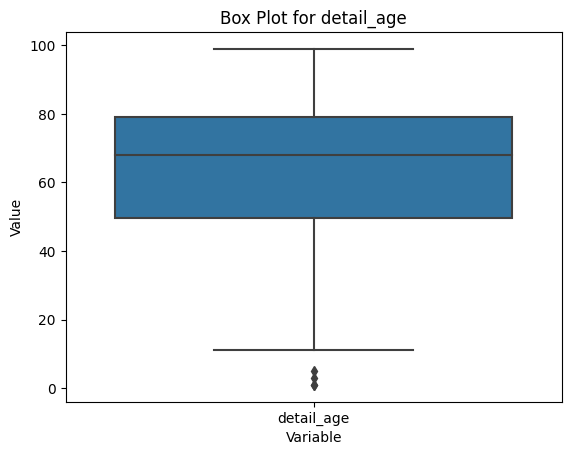

In [ ]:
# Non-Normalized Sample
sns.boxplot(data=sampled_df[['detail_age']])
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title("Box Plot for detail_age")
plt.show()

### Class Imbalances

In [ ]:
# Calculate class proportions
class_proportions = sampled_df['manner_of_death'].value_counts(normalize=True)

print(class_proportions)

0.0    0.979592
1.0    0.020408
Name: manner_of_death, dtype: float64


In [ ]:
# Get the data types for all columns in sampled_df
data_types2 = sampled_df.dtypes
print(data_types2)

education_2003_revision                category
month_of_death                         category
sex                                    category
place_of_death_and_decedents_status    category
marital_status                         category
day_of_week_of_death                   category
injury_at_work                         category
manner_of_death                        category
method_of_disposition                  category
autopsy                                category
icd_code_10th_revision                 category
358_cause_recode                       category
113_cause_recode                       category
39_cause_recode                        category
race                                   category
detail_age                                int64
dtype: object


In [29]:
# pip install imbalanced-learn
from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
# Sample data: Replace this with your own data
X_train, y_train = ..., ...  # Your training data and labels

# Create and train the Balanced Random Forest classifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
brf.fit(X_train, y_train)

# Make predictions
y_pred = brf.predict(X_test)

### Normalize Data and Encode Categorical Variables

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Normalize detail_age using Min-Max scaler
mms = MinMaxScaler()
sampled_df[['detail_age']] = mms.fit_transform(sampled_df[['detail_age']])
print(sampled_df)

        education_2003_revision month_of_death sex  \
1061527                     2.0              3   M   
1726871                     9.0              4   M   
1496687                     3.0              6   F   
2100099                     3.0             11   F   
781021                      3.0              5   M   
...                         ...            ...  ..   
816673                      2.0              1   F   
2386239                     4.0              9   M   
1364256                     2.0              3   F   
2322900                     7.0              5   F   
2237115                     3.0             11   M   

        place_of_death_and_decedents_status marital_status  \
1061527                                   1              D   
1726871                                   1              W   
1496687                                   4              M   
2100099                                   6              W   
781021                                   

In [ ]:
# Perform one-hot encoding on categorical columns
encoded_df = pd.get_dummies(sampled_df, columns=['education_2003_revision', 'month_of_death', 'sex', 'place_of_death_and_decedents_status', 'marital_status', 'day_of_week_of_death', 'injury_at_work','method_of_disposition', 'autopsy', 'race', 'manner_of_death'],
                            prefix=['education_2003_revision', 'month_of_death', 'sex', 'place_of_death_and_decedents_status', 'marital_status', 'day_of_week_of_death', 'injury_at_work','method_of_disposition', 'autopsy', 'race', 'manner_of_death'])
print(encoded_df)

        icd_code_10th_revision 358_cause_recode 113_cause_recode  \
1061527                   G931              194              111   
1726871                    W19              406              118   
1496687                   C509              104               29   
2100099                    G20              188               51   
781021                    I429              227               68   
...                        ...              ...              ...   
816673                    N185              327              100   
2386239                    C61              113               33   
1364256                    X42              420              122   
2322900                   C189               81               23   
2237115                   E780              173              111   

        39_cause_recode  detail_age  education_2003_revision_1.0  \
1061527              37    0.068136                        False   
1726871              39    0.082164            

### Column Distributions

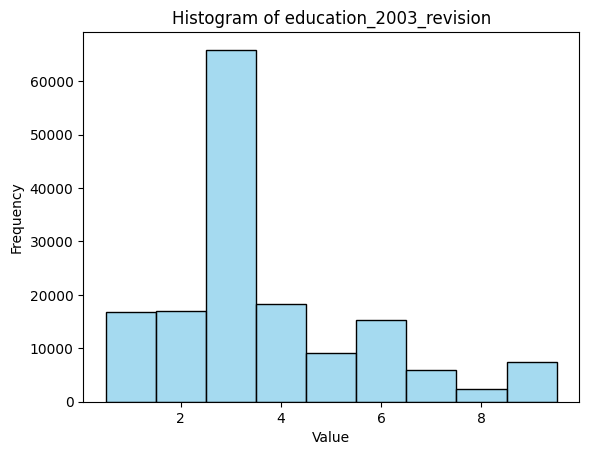

In [ ]:
education_2003_revision  = sampled_df['education_2003_revision']
sns.histplot(education_2003_revision, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of education_2003_revision')
plt.show()

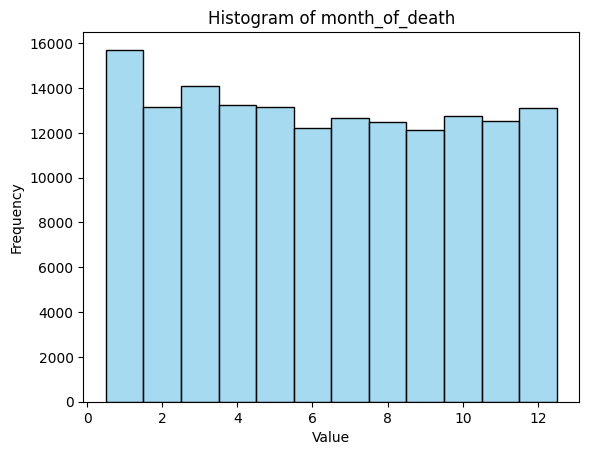

In [ ]:
month_of_death = sampled_df['month_of_death']
sns.histplot(month_of_death, bins=12
             , color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of month_of_death')
plt.show()

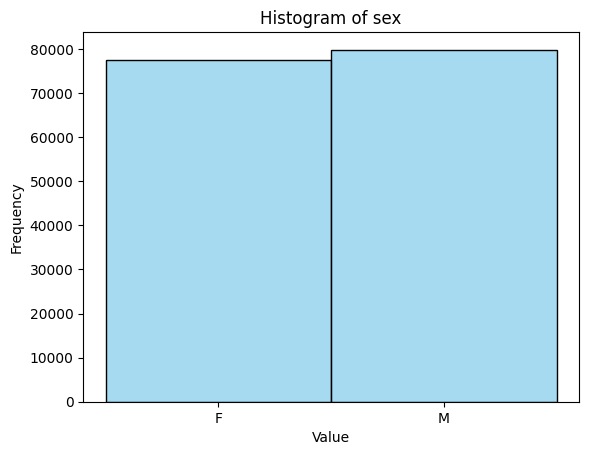

In [ ]:
sex = sampled_df['sex']
sns.histplot(sex, bins=2, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of sex')
plt.show()

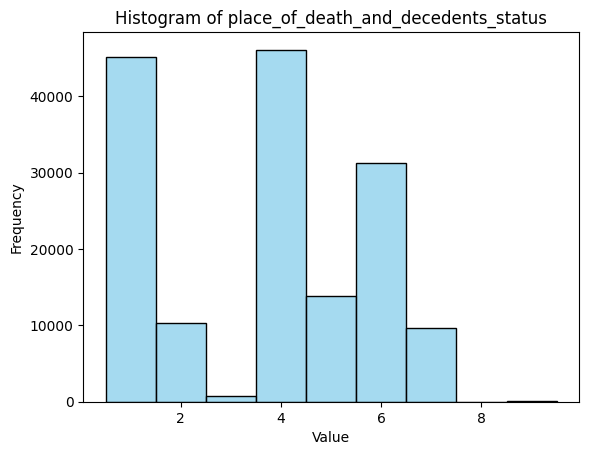

In [ ]:
place_of_death_and_decedents_status = sampled_df['place_of_death_and_decedents_status']
sns.histplot(place_of_death_and_decedents_status, bins=9, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of place_of_death_and_decedents_status')
plt.show()

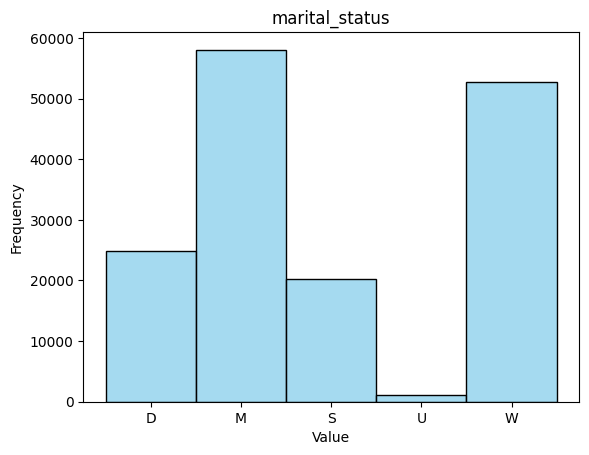

In [ ]:
marital_status = sampled_df['marital_status']
sns.histplot(marital_status, bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('marital_status')
plt.show()

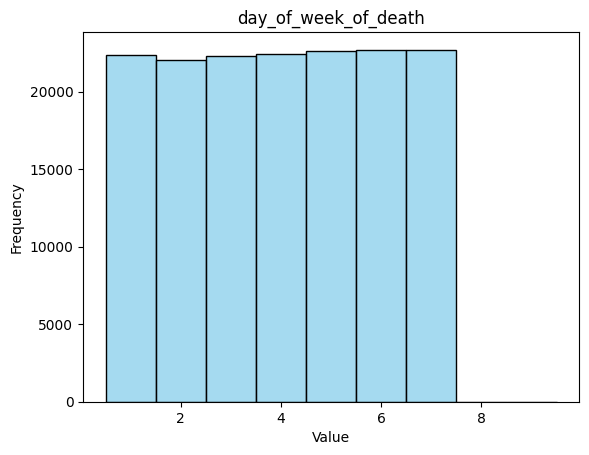

In [ ]:
day_of_week_of_death = sampled_df['day_of_week_of_death']
sns.histplot(day_of_week_of_death, bins=8, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('day_of_week_of_death')
plt.show()

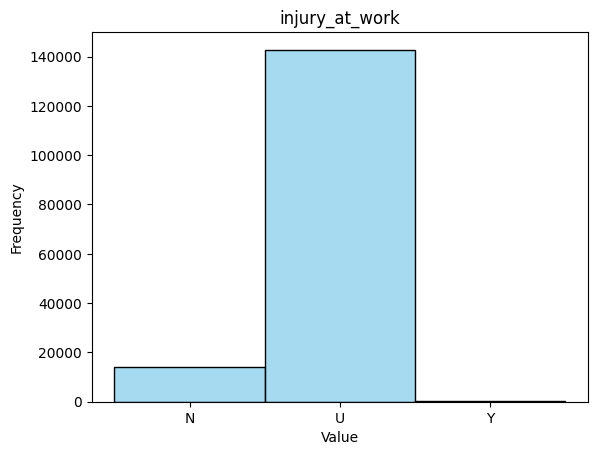

In [ ]:
injury_at_work = sampled_df['injury_at_work']
sns.histplot(injury_at_work, bins=3, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('injury_at_work')
plt.show()

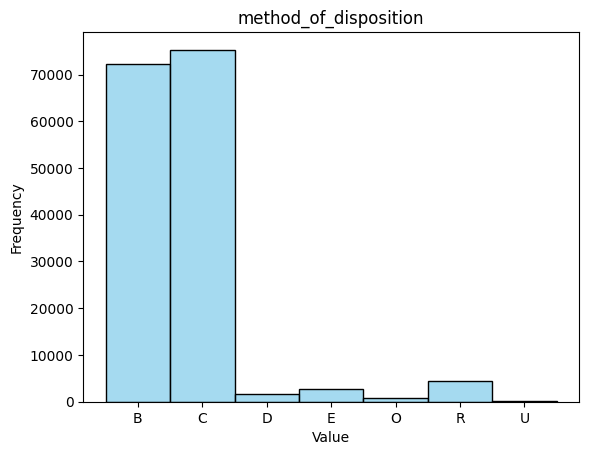

In [ ]:
method_of_disposition = sampled_df['method_of_disposition']
sns.histplot(method_of_disposition, bins=7, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('method_of_disposition')
plt.show()

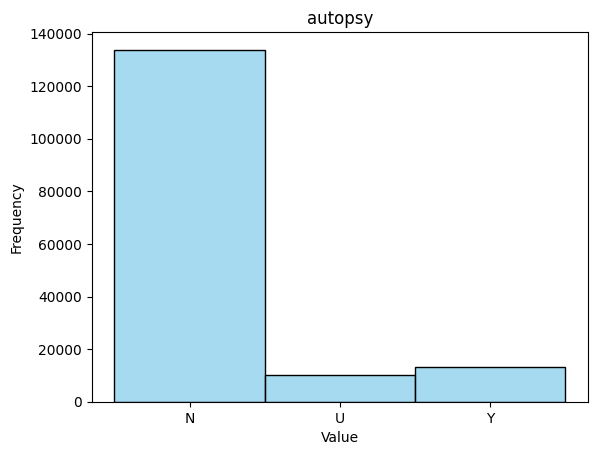

In [ ]:
autopsy = sampled_df['autopsy']
sns.histplot(autopsy, bins=3, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('autopsy')
plt.show()

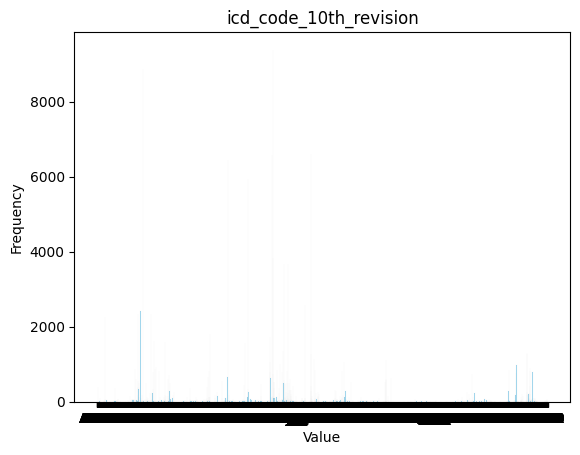

In [ ]:
icd_code_10th_revision = sampled_df['icd_code_10th_revision']
sns.histplot(icd_code_10th_revision, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('icd_code_10th_revision')
plt.show()

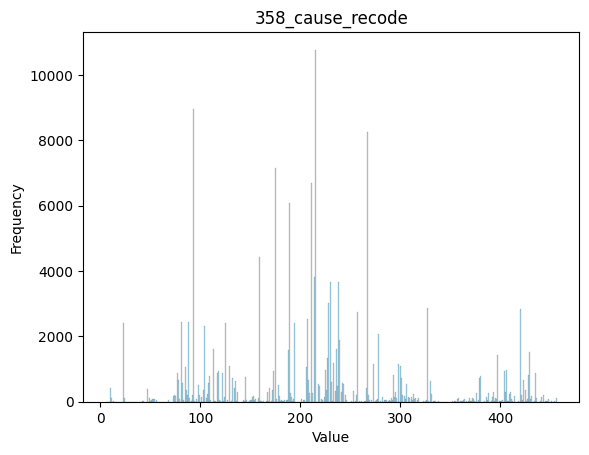

In [ ]:
cause_recode358 = sampled_df['358_cause_recode']
sns.histplot(cause_recode358, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('358_cause_recode')
plt.show()

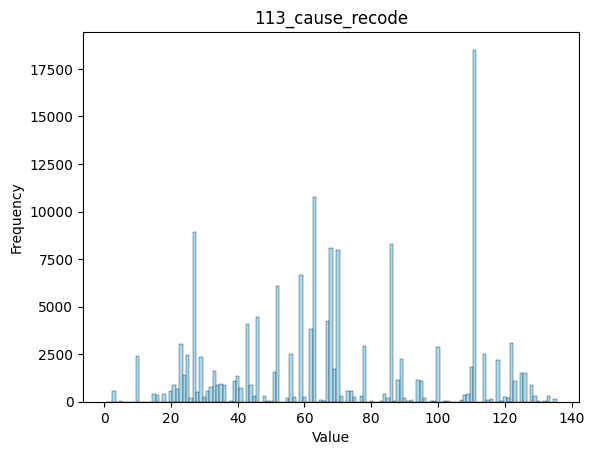

In [ ]:
cause_recode113 = sampled_df['113_cause_recode']
sns.histplot(cause_recode113, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('113_cause_recode')
plt.show()

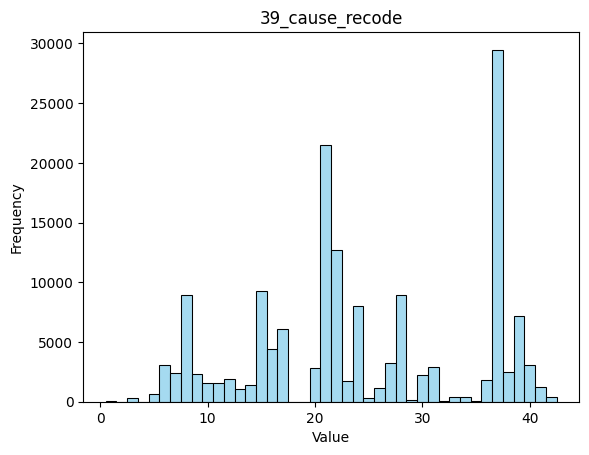

In [ ]:
cause_recode39 = sampled_df['39_cause_recode']
sns.histplot(cause_recode39, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('39_cause_recode')
plt.show()

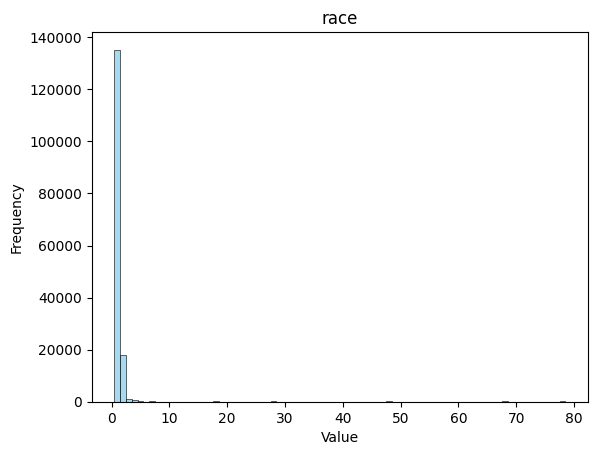

In [ ]:
race = sampled_df['race']
sns.histplot(race, bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('race')
plt.show()

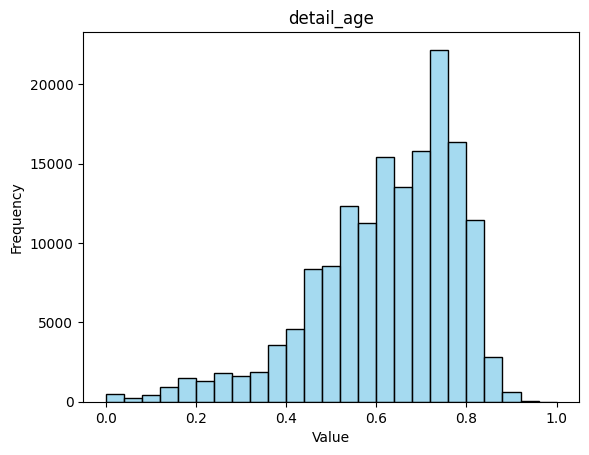

In [ ]:
detail_age = sampled_df['detail_age']
sns.histplot(detail_age, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('detail_age')
plt.show()

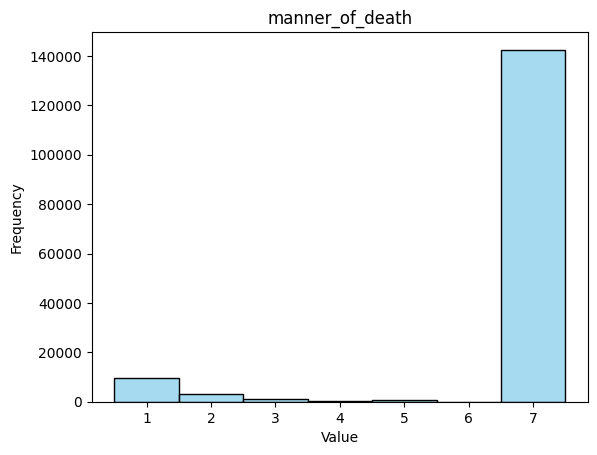

In [ ]:
manner_of_death = sampled_df['manner_of_death']
sns.histplot(manner_of_death, bins=7, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('manner_of_death')
plt.show()

### Correlations

In [ ]:
sampled_df = sampled_df.dropna()

In [ ]:
# pip install prince
import prince

In [ ]:
for column in sampled_df.columns:
    sampled_df[column] = pd.Categorical(sampled_df[column]).codes

# Perform MCA
mca = prince.MCA(n_components=16)
mca.fit(sampled_df)

# Access the eigenvalues and calculate the explained variance ratio
eigenvalues = mca.eigenvalues_
total_variance = sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance

# Access the results
print("Eigenvalues:")
print(mca.eigenvalues_)


print("\nExplained Variance Ratio:")
print(explained_variance_ratio)


print("\nPrincipal Coordinates:")
print(mca.row_coordinates(sampled_df))  # Coordinates of rows (observations)
print(mca.column_coordinates(sampled_df))  # Coordinates of columns (categories)


Eigenvalues:
[0.38276965 0.30056035 0.29464344 0.27160132 0.25924599 0.25749572
 0.25590418 0.25538497 0.25463032 0.25428458 0.25373016 0.25328447
 0.25246955 0.25234394 0.25183922 0.25150167]

Explained Variance Ratio:
[0.08898124 0.0698703  0.06849482 0.06313829 0.06026609 0.05985921
 0.05948923 0.05936853 0.0591931  0.05911272 0.05898384 0.05888023
 0.05869079 0.05866159 0.05854426 0.05846579]

Principal Coordinates:
              0         1         2         3         4         5         6   \
75720  -0.063480  0.061680  0.106782  0.050598  0.443497  0.235801  0.038391   
75508  -0.346006  0.097128 -0.408673 -1.407455 -0.687459 -0.331533  0.415502   
118506 -0.093909  0.041279  0.013451  0.089669  0.447612  0.189835 -0.035802   
76735  -0.216266  0.112944 -0.041583 -0.061994 -0.251950 -0.169647 -0.284681   
131653 -0.207846  0.030609 -0.137788 -0.060921 -0.194277 -0.157083 -0.456031   
...          ...       ...       ...       ...       ...       ...       ...   
121042 -0.282296

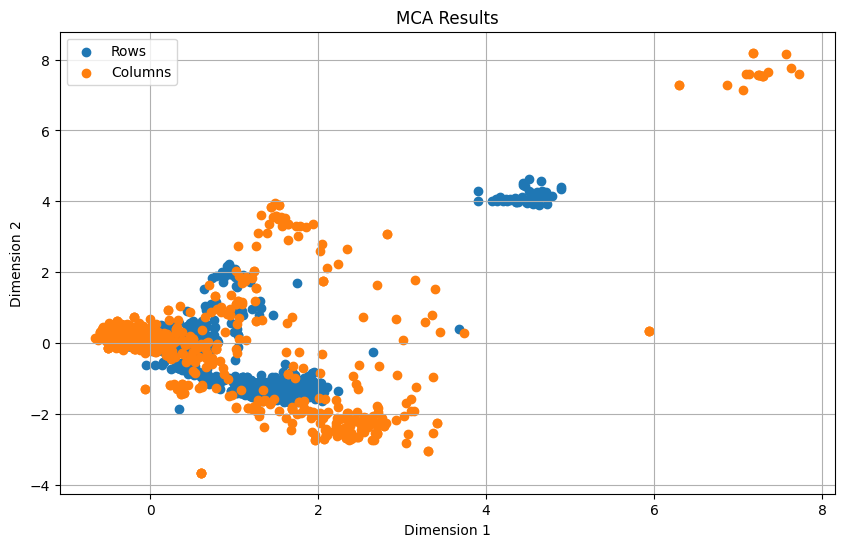

In [ ]:
# Plot MCA results
plt.figure(figsize=(10, 6))
plt.scatter(mca.row_coordinates(sampled_df).iloc[:, 0], mca.row_coordinates(sampled_df).iloc[:, 1], label='Rows')
plt.scatter(mca.column_coordinates(sampled_df).iloc[:, 0], mca.column_coordinates(sampled_df).iloc[:, 1], label='Columns')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.title('MCA Results')
plt.grid()
plt.show()

In [ ]:

# import matplotlib.pyplot as plt
# !pip install pandas scipy
from scipy.stats import chi2_contingency





In [ ]:
# Convert the categorical data to numerical labels (optional if already numeric)
for column in sampled_df.columns:
    sampled_df[column] = pd.Categorical(sampled_df[column]).codes

# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['detail_age'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.3301397857143287


In [ ]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['race'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.09587966641140015


In [ ]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['sex'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.047815850260538736


In [ ]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['autopsy'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.29631900572314135


In [ ]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['marital_status'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.15263745525286349


In [ ]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['month_of_death'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.0


In [ ]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['education_2003_revision'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.049919284262263774


In [ ]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['day_of_week_of_death'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.0


In [ ]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['injury_at_work'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.27210948050343914


In [ ]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['method_of_disposition'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.06302665133438425


In [ ]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['injury_at_work'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.27210948050343914


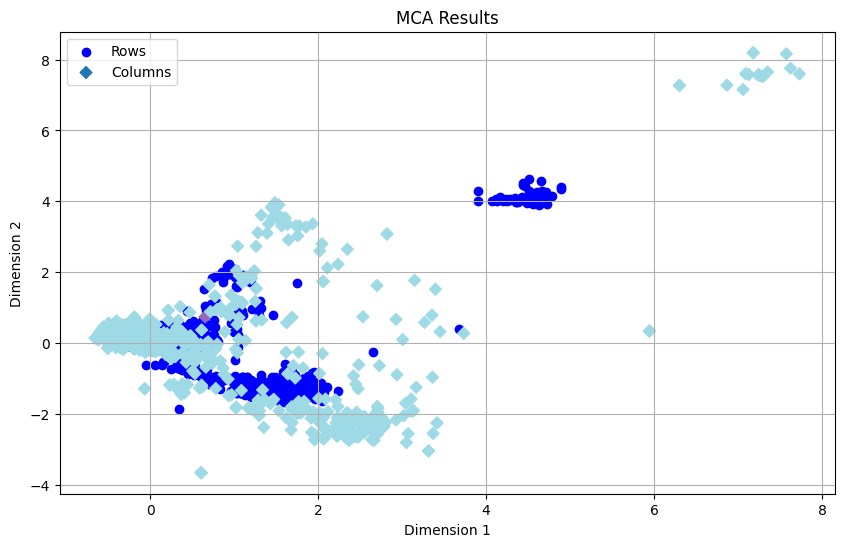

In [ ]:
# Plot MCA results
plt.figure(figsize=(10, 6))

# Scatter plot for rows with different colors
row_coords = mca.row_coordinates(sampled_df)
plt.scatter(row_coords.iloc[:, 0], row_coords.iloc[:, 1], c='blue', label='Rows')

# Scatter plot for columns with different colors
column_coords = mca.column_coordinates(sampled_df)
num_categories = column_coords.shape[0]
colors = plt.cm.tab20(np.arange(num_categories))  # Using tab20 colormap with 20 colors
plt.scatter(column_coords.iloc[:, 0], column_coords.iloc[:, 1], c=colors, marker='D', label='Columns')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.title('MCA Results')
plt.grid()
plt.show()

In [ ]:
# Correlation
# numeric_columns = sampled_df.select_dtypes(include='number')
# death_correlation_matrix = numeric_columns.corr()
# print(death_correlation_matrix)

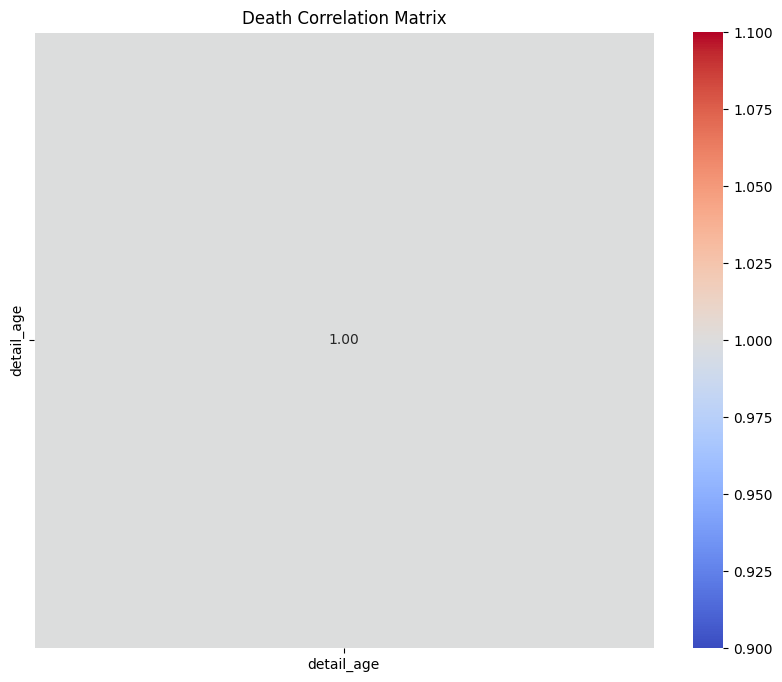

In [ ]:
# Plot the correlation matrix as a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(death_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title('Death Correlation Matrix')
# plt.show()